# Multiple Linear Regression - Predicting Boston Housing Prices

## Importing libraries

In [83]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import dmba
from dmba import regressionSummary

import matplotlib as mpl
import matplotlib.pyplot as plt

Printing versions of libraries

In [84]:
print('pandas version: {}'.format(pd.__version__))
print('sklearn version: {}'.format(sklearn.__version__))
print('dmba version: {}'.format(dmba.__version__))
print('matplotlib version: {}'.format(mpl.__version__))

pandas version: 1.5.3
sklearn version: 1.2.1
dmba version: 0.2.4
matplotlib version: 3.7.0


# Loading data

In [85]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


Renaming 'CAT. MEDV' column to 'CAT_MEDV'

In [95]:
df = df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})

## Analyzing data

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  LSTAT     506 non-null    float64
 12  MEDV      506 non-null    float64
 13  CAT_MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [98]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


## Performing multiple linear regression

We will start with only three features CRIM, CHAS and RM. Later we will expand this experiment to include all the features.

In [99]:
predictors = ['CRIM', 'CHAS', 'RM']
outcome = 'MEDV'

X = df[predictors]
y = df[outcome]

X.head()

,CRIM,CHAS,RM
0,0.00632,0,6.575
1,0.02731,0,6.421
2,0.02729,0,7.185
3,0.03237,0,6.998
4,0.06905,0,7.147


Partioning data into training and testing sets

In [100]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

Fitting regression model to training set

In [101]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

Printing coefficients and regression statistics

In [102]:
print(pd.DataFrame({'Predictor': X.columns, 'Coefficient': model.coef_}))

# printing performance measures (training data)
regressionSummary(train_y, model.predict(train_X))

  Predictor  Coefficient
0      CRIM    -0.240062
1      CHAS     3.266817
2        RM     8.325175

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 5.9666
            Mean Absolute Error (MAE) : 3.9668
          Mean Percentage Error (MPE) : -7.2747
Mean Absolute Percentage Error (MAPE) : 22.5927


Predicting prices in validation set

In [103]:
pred = model.predict(valid_X)
residuals = valid_y - pred

result = pd.DataFrame({'Predicted': pred, 
                       'Actual': valid_y,
                       'Residual': residuals})

# Printing predicted prices (and errors) for 20 houses in validation set 
display(result.head(20))

# printing performance measures on validation data
regressionSummary(valid_y, pred)

,Predicted,Actual,Residual
307,27.813818,28.2,0.386182
343,26.545802,23.9,-2.645802
47,20.952301,16.6,-4.352301
67,19.728016,22.0,2.271984
362,14.563121,20.8,6.236879
132,23.712901,23.0,-0.712901
292,25.993767,27.9,1.906233
31,21.031780,14.5,-6.531780
218,23.589896,21.5,-2.089896
90,24.217938,22.6,-1.617938



Regression statistics

                      Mean Error (ME) : 0.1174
       Root Mean Squared Error (RMSE) : 6.4125
            Mean Absolute Error (MAE) : 4.4558
          Mean Percentage Error (MPE) : -7.6160
Mean Absolute Percentage Error (MAPE) : 23.1676


Plotting histogram of validation errors

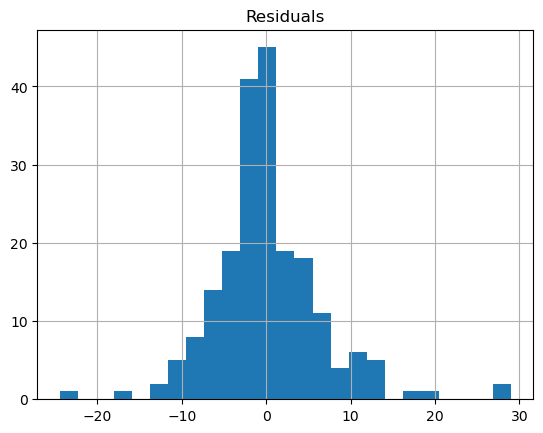

In [104]:
fix, ax = plt.subplots()
ax.hist(residuals, bins=25)
plt.title('Residuals')
plt.grid()
plt.show()

Finding the equation for predicting the median house price from the predictors in the model

In [105]:
intercept = model.intercept_
coefs = model.coef_
print(f"y = {intercept:.2f} + {coefs[0]:.2f} {X.columns[0]} + {coefs[1]:.2f} {X.columns[1]} + {coefs[2]:.2f} {X.columns[2]}")

y = -29.19 + -0.24 CRIM + 3.27 CHAS + 8.33 RM


## Reducing Number of Predictors